# Graphing out language frequencies per year

Because knowing how the languages are distributed over the years is important, I think that it would be helpful to try and graph out all of the languages as they are distributed over the years, by quantity of letters. Some of this was already done in `processing.ipynb`, but it
would be good to get some cleaner graphs about that.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dates = pd.read_csv('per_year_sentiment.csv')

600

In [5]:
dates["meta_date"] = pd.to_datetime(dates["meta-date"])
dates.head()

,Unnamed: 0,meta-date,meta-href,meta-text,meta-author,meta-lang,meta-sentiment,meta_date
0,0,1866-05-31,https://megadigital.bbaw.de/briefe/detail.xql?...,"\n\n | 47, Princess Street,Man...",Ernest (Ernst) Charles Jones,en,"('pos', 0.076)",1866-05-31
1,1,1866-05-16,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | Mchr 16 Mai 1866.\nLieb...,Friedrich Engels,de,"('neg', 0.8568170070648193)",1866-05-16
2,2,1866-09-05,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | 5 Sept. 1866.\nMy belov...,Karl Marx,en,"('pos', 0.134)",1866-09-05
3,3,1866-08-31,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | 18 Bouverie StFriday Af...,William Randall Cremer,en,"('pos', 0.135)",1866-08-31
4,4,1866-11-12,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | Londres. 12 Nov.\n ...,François Lafargue,fr,"('pos', 0.6401874423027039)",1866-11-12


In [6]:
date_freq = dict()

for date in dates['meta_date']:
  dfs = dates[dates['meta_date'] == date]
  ens = len(dfs['meta-lang'] == 'en')
  frs = len(dfs[dfs['meta-lang'] == 'fr'])
  des = len(dfs[dfs['meta-lang'] == 'de'])
  rus = len(dfs[dfs['meta-lang'] == 'ru'])
  if date in date_freq:
      date_freq[date]['en'] += ens
      date_freq[date]['fr'] += frs
      date_freq[date]['de'] += des
      date_freq[date]['ru'] += rus
  else:
      date_freq[date] = dict()
      date_freq[date]['en'] = ens
      date_freq[date]['fr'] = frs
      date_freq[date]['de'] = des
      date_freq[date]['ru'] = rus

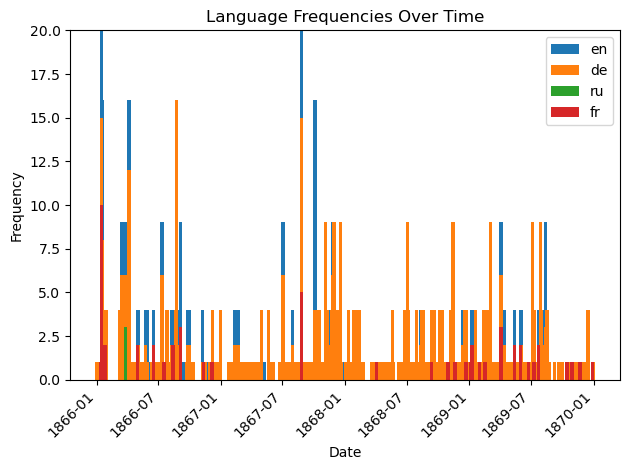

In [16]:

ds = list(date_freq.keys())
languages = ['en', 'de', 'ru', 'fr']

for language in languages:
    freqs = [entry[language] for entry in date_freq.values()]
    plt.bar(ds, freqs, width=10, label=language)

plt.xticks(rotation=45, ha="right")
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.ylim((0, 20))
plt.title('Language Frequencies Over Time')
plt.legend()

plt.tight_layout()
plt.show()
